In [1]:
import os
import sys
sys.path.insert(0, os.path.abspath('/home/babs/Documents/DIFACQUIM/PPI_ML'))

In [2]:
import phase1


In [3]:
from phase1.support_functions.df_management import get_data, get_random_smiles, get_positive_records, filter_positive_bits, filter_negative_bits
from phase1.support_functions.draw_molecules import get_ECFP4_bits, get_ECFP6_bits, draw_one_fragment

In [4]:
from phase1.support_functions.df_management import *

In [5]:
coeff = get_coefficients("SVM17_+_-std.csv")
coeff = coeff.Descriptors.to_list()
coeff[:5]

[1390, 935, 1160, 202, 160]

In [6]:
data = get_data("dataset_ecfp6.csv")
print(data.head(2))

   ipp_id chembl_id                                             SMILES  \
0     4.0       NaN     OC(=O)[C@H](Cc1c[nH]c2ccccc12)NC(=O)c1ccccc1Br   
1     7.0       NaN  Cc1cc2CN(CCc2c(C)c1C(=O)N[C@@H](CNC(=O)c1cccs1...   

  library  PPI family  PPI    0    1    2    3  ...  2038  2039  2040  2041  \
0     PPI  LFA / ICAM  Yes  0.0  1.0  0.0  0.0  ...   0.0   0.0   0.0   0.0   
1     PPI  LFA / ICAM  Yes  0.0  1.0  0.0  0.0  ...   0.0   0.0   0.0   0.0   

   2042  2043  2044  2045  2046  2047  
0   0.0   0.0   0.0   0.0   0.0   0.0  
1   0.0   0.0   0.0   0.0   0.0   0.0  

[2 rows x 2054 columns]


/home/babs/.pyenv/versions/miniconda3-3.8-4.9.2/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3357: DtypeWarning: Columns (2,5) have mixed types.Specify dtype option on import or set low_memory=False.
  if (await self.run_code(code, result,  async_=asy)):


In [7]:
# bring molecule information
molecule0 = data.iloc[0]
molecule0.SMILES

'OC(=O)[C@H](Cc1c[nH]c2ccccc12)NC(=O)c1ccccc1Br'

In [8]:
#positive records for molecule0
molecule0_positive = get_positive_records(molecule0)

In [9]:
molecule0_positive[:5]

[1, 46, 57, 79, 80]

In [10]:
import rdkit
from rdkit import Chem
from rdkit.Chem import rdMolDescriptors
from rdkit.Chem.Draw import IPythonConsole

# filter positives

In [19]:
bits_ = [935]
positives_0 = filter_positive_bits(bits_, data)
positives_0

,ipp_id,chembl_id,SMILES,library,PPI family,PPI,0,1,2,3,...,2038,2039,2040,2041,2042,2043,2044,2045,2046,2047
1,7.0,NaN,Cc1cc2CN(CCc2c(C)c1C(=O)N[C@@H](CNC(=O)c1cccs1...,PPI,LFA / ICAM,Yes,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,24.0,NaN,Cc1cc2CN(CCc2c(C)c1C(=O)N[C@@H](CNC(=O)c1cccs1...,PPI,LFA / ICAM,Yes,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,26.0,NaN,CC(C)c1ccccc1Sc1ccc(cc1C(F)(F)F)-c1ccnc(c1)N1C...,PPI,LFA / ICAM,Yes,0.0,1.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,28.0,NaN,FC(F)(F)c1c(Sc2ccccc2OCc2cccnc2)ccc(\C=C\C(=O)...,PPI,LFA / ICAM,Yes,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,31.0,NaN,CC(=O)N1CCN(CC1)c1cc(ccn1)-c1ccc(Sc2ccc3OCCOc3...,PPI,LFA / ICAM,Yes,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4600,NaN,Eslicarbazepine,NC(=O)N1C2=C(C[C@H](O)C3=C1C=CC=C3)C=CC=C2,FDA,NaN,No,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4608,NaN,Lypressin,[H]N([H])C(=O)C[C@]1([H])NC(=O)[C@H](CCC(N)=O)...,FDA,NaN,No,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4624,NaN,Larotrectinib,O[C@H]1CCN(C1)C(=O)NC1=C2N=C(C=CN2N=C1)N1CCC[C...,FDA,NaN,No,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4625,NaN,Cefamandole nafate,[H][C@]12SCC(CSC3=NN=NN3C)=C(N1C(=O)[C@H]2NC(=...,FDA,NaN,No,0.0,1.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [20]:
# positives_0

In [21]:
#bits_ = [1390, 935]
#positives_1 = filter_positive_bits(bits_, data)
# print(f"molecules : {positives_1.shape}")
# print(positives_1.iloc[90][["ipp_id", "SMILES"]])

In [22]:
data[data["ipp_id"]==1798.0]["935"]

965    1.0
Name: 935, dtype: float64

In [23]:
positives_0[positives_0["ipp_id"]==1798.0]

,ipp_id,chembl_id,SMILES,library,PPI family,PPI,0,1,2,3,...,2038,2039,2040,2041,2042,2043,2044,2045,2046,2047
965,1798.0,NaN,CC1(C)CCC(CN2CCN(CC2)c2ccc(C(=O)NS(=O)(=O)c3cc...,PPI,BCL2-Like / BAX,Yes,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [26]:
positive_molecule = positives_0[positives_0["ipp_id"]==1798.0].SMILES


In [33]:
positive_molecule = positive_molecule.iloc[0]


In [35]:
#draw_one_fragment(positive_molecule, 1390, 3)

In [38]:
positive_molecule

'CC1(C)CCC(CN2CCN(CC2)c2ccc(C(=O)NS(=O)(=O)c3ccc(NCC4CCOCC4)c(c3)[N+]([O-])=O)c(Oc3cnc4[nH]ccc4c3)c2)=C(C1)c1ccc(Cl)cc1'

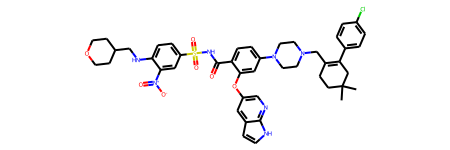

In [36]:
mol_ = Chem.MolFromSmiles(positive_molecule)
mol_

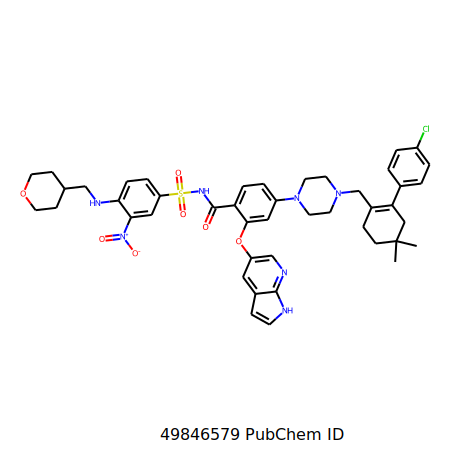

In [39]:
from rdkit import Chem
from IPython.display import SVG
from rdkit.Chem import rdDepictor
from rdkit.Chem.Draw import rdMolDraw2D

mol = Chem.MolFromSmiles('CC1(C)CCC(CN2CCN(CC2)c2ccc(C(=O)NS(=O)(=O)c3ccc(NCC4CCOCC4)c(c3)[N+]([O-])=O)c(Oc3cnc4[nH]ccc4c3)c2)=C(C1)c1ccc(Cl)cc1')
rdDepictor.Compute2DCoords(mol)
drawer = rdMolDraw2D.MolDraw2DSVG(450, 450)
drawer.DrawMolecule(mol)
drawer.FinishDrawing()

# svg to text
s = drawer.GetDrawingText()
s = s.replace('svg:','')

# use svgutils to add text to svg
import svgutils.transform as sg
fig = sg.fromstring(s)
label = sg.TextElement(160, 440, 
                       "49846579 PubChem ID", size=16, 
                      )
fig.append(label)
root = "/home/babs/Documents/DIFACQUIM/PPI_ML/phase1/driver_code/chemical_structures/"
fig.save(f"{root}1798.svg")
SVG(fig.to_str())

In [40]:
mol_ = Chem.Draw.MolToImage(mol_)
type(mol_)

PIL.PngImagePlugin.PngImageFile

In [41]:
from rdkit.Chem import rdMolDescriptors
from rdkit.Chem import Draw
positive_mol = Chem.MolFromSmiles(positive_molecule)
bi = {}
fp = rdMolDescriptors.GetMorganFingerprintAsBitVect(
        positive_mol, radius=3, bitInfo=bi)

In [43]:
desired_bits =  (935, 1160, 753, 147, 1684)

In [44]:
desired_bites = common_bits(coeff, get_ECFP6_bits(positive_molecule))
desired_bites

[935, 1160, 753, 147, 1684]

In [47]:
desired_bits =  (935, 1160, 147, 1684)

In [48]:
#set desired bites manually

In [49]:
#Visualizacion con filtro
tpls =[(positive_mol,x,bi) for x in fp.GetOnBits() if x in desired_bits]
# print(tpls)


drawOptions = Draw.rdMolDraw2D.MolDrawOptions()
drawer = Draw.DrawMorganBits(tpls,molsPerRow=4,legends=[str(x) for x in fp.GetOnBits() if x in desired_bits ], 
                             #useSVG=True,
                             subImgSize=(450, 450),
                             drawOptions = drawOptions,
                            )


In [50]:
drawer.save("1798_fragments.jpg")

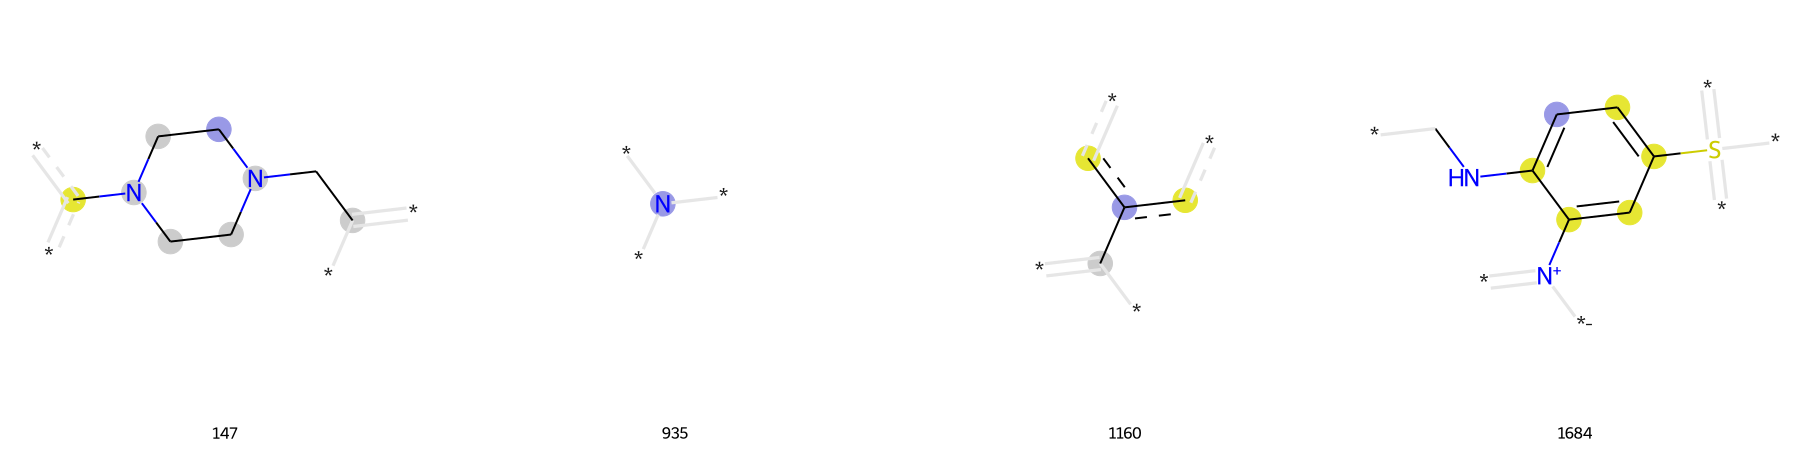

In [51]:
drawer

In [52]:
from PIL import Image
#Read the two images
#image1 = mol_
image1 = Image.open(f'{root}1798.jpg')
image1.show()
image2 = Image.open(f'{root}1798_fragments.jpg')
#image2.show()
#resize, first image
image1 = image1.resize((450, 450))
#image2 = image2.resize((450, 450))
image1_size = image1.size
image2_size = image2.size
new_image = Image.new('RGB',(5*image1_size[0], image1_size[1]), (450, 450, 450))
new_image.paste(image1,(0,0))
new_image.paste(image2,(image1_size[0],0))
new_image.save(f"{root}id1798_merged.jpg","JPEG")
new_image.show()

# filter negatives

In [ ]:
negative_0 = filter_negative_bits(["558"], data)
negative_0.head(2)

In [ ]:
negative_molecule_0 = negative_0.iloc[0]
negative_molecule_0.SMILES
# draw_one_fragment(positive_molecule, 57)

In [ ]:
draw_one_fragment(positive_molecule, 57)

In [ ]:
draw_one_fragment(positive_molecule, 57)

In [ ]:
negative_1 = filter_negative_bits(["558", "1"], data)
negative_1.head()

In [ ]:
# calculo de porcentajes 548
negatives = negative_0[negative_0["library"]=="PPI"].shape[0]

In [ ]:
total = data[data["library"]=="PPI"].shape[0]

In [ ]:
percentage = (negatives/total)
percentage